# Letter Recogition

### Step 1: Importing Libraries

In [243]:
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

I found this dataset <a href="https://archive.ics.uci.edu/ml/datasets/Letter+Recognition">here</a><br>
<I>(Needs naming to the columns.)</I>

### Step 2: Importing data

In [244]:
df = pd.read_csv("./Sentdex Playlist/Datasets/letter-recognition.data")
df.head()

,letter,x_box_hor,y_box_vert,width,height,onpix_tot,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x-ege,x_egvy,y_ege,y_egvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [245]:
df.describe()

,x_box_hor,y_box_vert,width,height,onpix_tot,x_bar,y_bar,x2_bar,y2_bar,xy_bar,x2y_bar,xy2_bar,x-ege,x_egvy,y_ege,y_egvx
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [246]:
df.fillna(-99999, axis=1, inplace=True)

In [247]:
features = df.drop(columns=['letter'], axis=1)

In [248]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

In [249]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
print(features.shape)
print(features_pca.shape)

(20000, 16)
(20000, 2)


In [250]:
labels = np.array([ord(letter)-52 for letter in np.array(df['letter'])])
labels

array([32, 21, 16, ..., 32, 31, 13])

In [251]:
df = pd.DataFrame(features_pca, columns=["1st component", "2nd component"])
df["letter"] = labels.astype(float)
df

,1st component,2nd component,letter
0,-2.080335,-1.721468,32.0
1,0.369372,2.014143,21.0
2,1.654350,1.754967,16.0
3,1.490280,-0.508868,26.0
4,-3.080981,2.069847,19.0
...,...,...,...
19995,-2.380036,0.131237,16.0
19996,1.957902,-1.326378,15.0
19997,1.285033,-3.849978,32.0
19998,-2.345299,0.183462,31.0


<AxesSubplot:xlabel='1st component', ylabel='2nd component'>

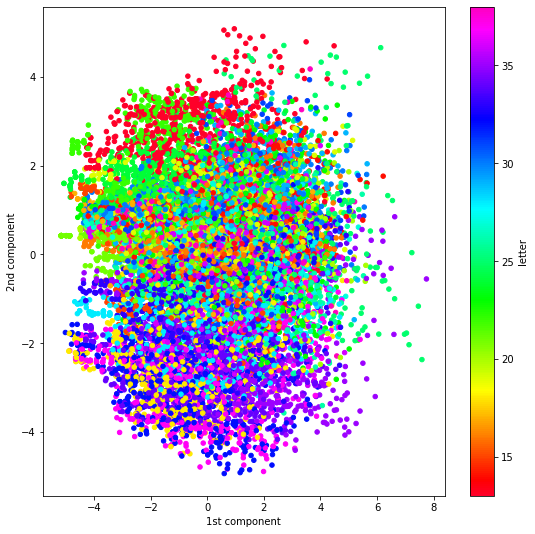

In [252]:
df.plot.scatter(x='1st component', y='2nd component', c='letter', cmap='gist_rainbow', figsize=(9,9), sharex=False)

In [253]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
features_embedded = tsne.fit_transform(features_scaled)
features_embedded

c:\Users\Shrirang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Shrirang\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 53.523285 , -61.733315 ],
       [-12.899641 ,  39.71882  ],
       [  2.9689672,   7.2857   ],
       ...,
       [ 34.968132 ,  47.707798 ],
       [ 22.91823  ,  -8.709021 ],
       [-43.365044 ,  35.56854  ]], dtype=float32)

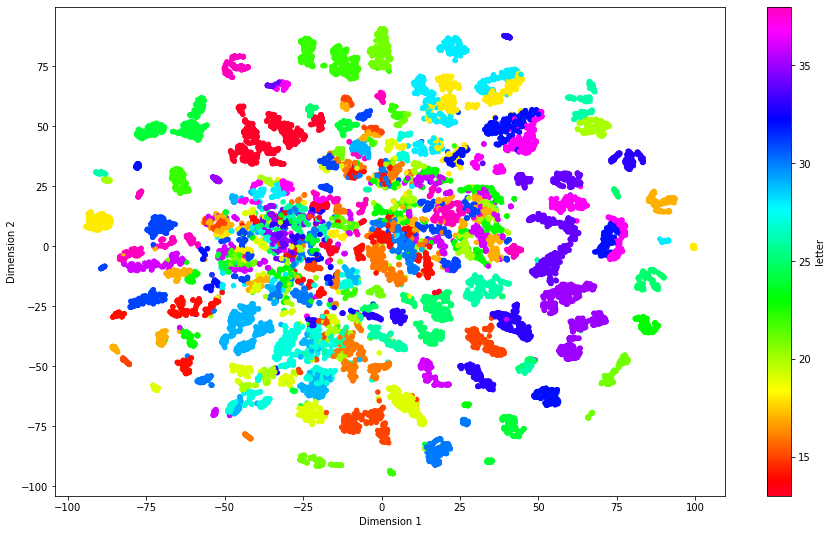

In [254]:
df2 = pd.DataFrame(features_embedded, columns=["Dimension 1", "Dimension 2"])
df2["letter"] = labels
df2.plot.scatter(x='Dimension 1', y='Dimension 2', c='letter', cmap='gist_rainbow', figsize=(15,9), sharex=False);

In [255]:
df = pd.read_csv("./Sentdex Playlist/Datasets/letter-recognition.data")

In [256]:
X = np.array(df.drop(['letter'], axis=1))
y = np.array(df['letter'])
X.shape, y.shape

((20000, 16), (20000,))

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [258]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
classifier1 = GaussianNB()
classifier1.fit(X_train, y_train)
Y_pred = classifier1.predict(X_test)
accuracy = accuracy_score(y_test, Y_pred) * 100
print(f"With Naive Bayes:\n{accuracy=}%")

With Naive Bayes:
accuracy=64.1%


In [259]:
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print(f"With K-nearest Neighbours:\n{accuracy=}")

With K-nearest Neighbours:
accuracy=0.95225


In [260]:
nusvc = svm.NuSVC()
nusvc.fit(X_train, y_train)
accuracy = nusvc.score(X_test, y_test)
print(f"With NuSVC:\n{accuracy=}")

With NuSVC:
accuracy=0.809


In [261]:
svc = svm.SVC()
svc.fit(X_train, y_train)
accuracy = svc.score(X_test, y_test)
print(f"With SVC:\n{accuracy=}")

With SVC:
accuracy=0.92675


In [262]:
example_data = [[5,9,5,8,6,6,11,7,3,7,3,9,2,7,5,11]]
example_measures = np.array(example_data).reshape(len(example_data), -1)
prediction = knn.predict(example_measures)
print(prediction)

['R']


In [263]:
example_data = [[6,13,2,7,4,6,7,6,3,10,7,9,5,9,5,8]]
example_measures = np.array(example_data).reshape(len(example_data), -1)
prediction = knn.predict(example_measures)
print(prediction)

['O']
